# **Outliers**

An outlier is an individual point of data that is distant from other points in the dataset. It is an anomaly in the dataset that may be caused by a range of errors in capturing, processing or manipulating data.

How to interpret weather the Outliers are dangerous for our data or not?
When to remove the outliers? 

example: If theres a age column in the data and we have a value as 300, then its totally irrelevent.


## Effect of Outliers on ML Algorithms:

Outliers have a Negative impact on a  certain set of ML Algorithms:

*   Linear Regression
*   Logistic Regression

*   Adaboost
*   Deep Learning

Algorithms which are not much affected by Ouliers:


*   Tree Based

*   Non Weight basee






# How to treat Outliers?



1.  **Trimming:** To remove the outlier values from the data..

 

*   A problem with this approach is that the data becomes **Thin** and an advantage is that it is a very fast technique.

2. **Capping:** An outlier is usually on either very low side or very high size, so can set a limit on the data on both the sides and everything beyond that limit is considered to be an outlier.

3. **Treating outlier as Missing Value:** Consider the outlier as NaN and treat it as a missing value.

4. **Discretization:** This method helps us to create ranges and so the outliers gets merged in the range.






# Using different Distributions to detect Outliers:

1. **Normal Distribution:** 


 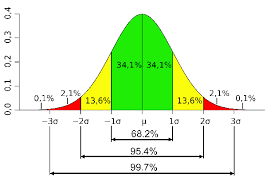

 The mean is represented as 'µ' (mu) so for the condition:

 (µ-3σ)>outlier>(µ+3σ)  then the value can be considered as an outlier.

 This is strictly applicable when the data is normally distributed.

2. **Skewed Distribution:**


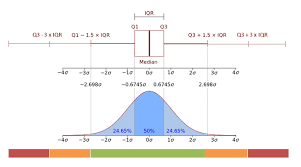

Min = Q1 - 1.5(IQR)

Max = Q3 + 1.5(IQR)

where IQR is the Interquartile Range

Any value outside these min and max ranges can be treated as Outliers.

3. **Other Distributions:**


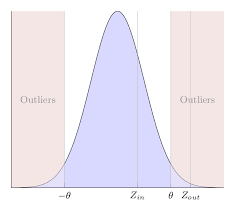

# Techniques for Removal of Outliers:

# 1. Z Score treatment:

**Assumption:** The column that you are working on should be Normally Distributed.



**Outlier Detection:** In this technique we just try to check that values lying ouside (µ-3σ) and (µ+3σ) would be considered an Outlier.


Formula

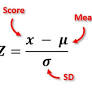


Z	=	standard score

x	=	observed value

mu	=	mean of the sample

sigma	=	standard deviation of the sample




Steps to Remember:

Step 1: See if the data is Normally distributed and not skewed.

step 2: Find out mean + 3 standard deviation and mean - 3 standard deviation to set the limits.

Step 3: Then figure out weather you want to do Trimming or Capping.

**Outlier Treatment:**

1.   Trimming: If from the formula we get -3,3 then all values outside it will be removed. But problem arises that sometimes, huge amount of data can be removed, to avoid this we use Capping.

2.   Capping: Determining the Min and Max value exapmle caluculating (µ+3σ) = 80 and (µ-3σ) = 5 , suppose we had ouliers 85, 3, 90. Now we can convert these to 80, 5, 80.



## Code

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [96]:
warnings.filterwarnings("ignore")

In [97]:
from google.colab import files

upload = files.upload()

Saving placement.csv to placement (2).csv


In [98]:
df = pd.read_csv('placement.csv')

In [99]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [100]:
df.shape

(1000, 3)

In [101]:
df.sample(10)

,cgpa,placement_exam_marks,placed
227,7.03,19.0,0
149,6.81,58.0,0
283,7.09,87.0,0
393,6.60,18.0,0
241,7.22,18.0,0
520,7.39,20.0,1
703,7.04,41.0,0
996,9.12,65.0,1
854,5.83,68.0,1
834,6.22,52.0,1


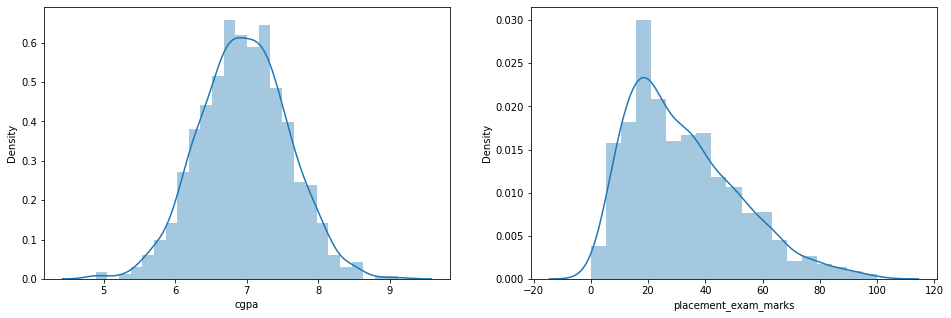

In [102]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

**Inference:** We can clearly see that the cgpa curve is normally distributed and the placement marks curve is skewed.

Hence, we can use easily use the Z score method in the first curve.

In [103]:
print('Mean value of cgpa',df['cgpa'].mean())
print('Std value of cgpa',df['cgpa'].std())
print('Min value of cgpa',df['cgpa'].min())
print('Max value of cgpa',df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [104]:
# finding the boundary values

print('Highest allowed',df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed',df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


**Inference:** Here we set the boundaries that any value above 8.808 and below 5.113 will be considered as an outlier.

In [105]:
#finding the outlier

df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**Inference:** 5 outliers found after setting the boundary conditions.

# **Trimming** the outliers

In [106]:
new_df= df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


**Inference:** We could see that initially the shape of the data was (1000,3) but now after trimming the outliers it is reduced to (995,3)

In [107]:
# Approach 2 
# Calculating the Z score using formula

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [108]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


**Inference:** Now we have a Zcore for all the students, so we know that we only have to keep the students which have z scores from -3 to 3 rest all are outliers.

In [109]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [110]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [111]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [112]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# **Capping** the outliers

In [113]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [114]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [115]:
df.shape

(1000, 4)

In [116]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

##2. Outlier Detection and Removal using Boxplot and IQR for Skewed Distribution

**What is a BoxPlot?**

Box plots are charts showing the distribution of data points across a selected measure. These charts display ranges within variables measured. This includes the outliers, the median, the mode, and where the majority of the data points lie in the “box”.

*   We can plot a Boxplot for any numerical column.
*   We have percentiles in box plot i.e example the 100 percentile value is 89 that means all the other values are less than 89.



**Boxplot for outliers:**

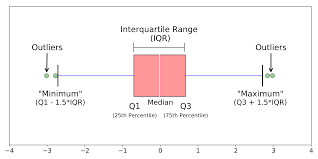

Here Q1 is 25 percentile and Q3 is 75 percentile.

What is IQR?

IQR is the difference between Q3 and Q1. To calculate the max we have Q3 + 1.5*IQR

and to calculate the min we have Q1 - 1.5*IQR. These formulas are known as IQR Proximity Rule.

All the values outside min and max can be considered as outliers. 

## Code

In [119]:
df = pd.read_csv('placement.csv')

In [120]:
df.shape

(1000, 3)

In [121]:
df.sample(10)

,cgpa,placement_exam_marks,placed
51,6.24,28.0,1
996,9.12,65.0,1
362,7.25,21.0,1
626,7.63,19.0,1
875,5.73,16.0,1
962,7.09,46.0,1
420,7.59,49.0,0
733,7.07,10.0,0
431,7.64,21.0,0
115,7.28,37.0,0


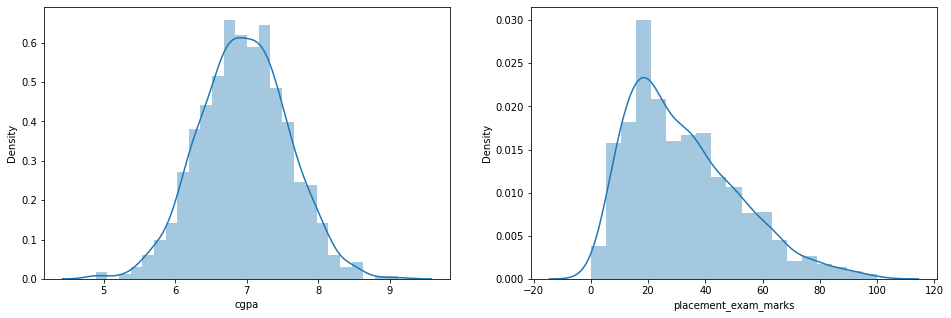

In [122]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

**Inference:** We see that the placement marks curve is skewed so we are going to use the IQR method to detect outliers and remove them.

In [123]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [124]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

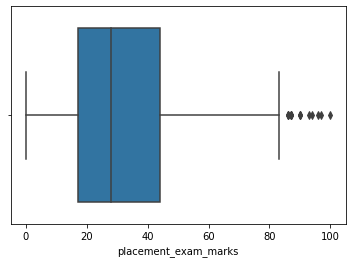

In [125]:
sns.boxplot(df['placement_exam_marks'])

Step 1: Finding the IQR

In [126]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [127]:
percentile25

17.0

In [128]:
percentile75

44.0

In [129]:
iqr = percentile75 - percentile25
iqr

27.0

In [130]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [131]:
print('upper limit',upper_limit)
print('lower limit',lower_limit)

upper limit 84.5
lower limit -23.5


In [132]:
#finding outliers
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [133]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [134]:
#trimming the outliers

new_df = df[df['placement_exam_marks'] < upper_limit]

In [135]:
new_df.shape

(985, 3)

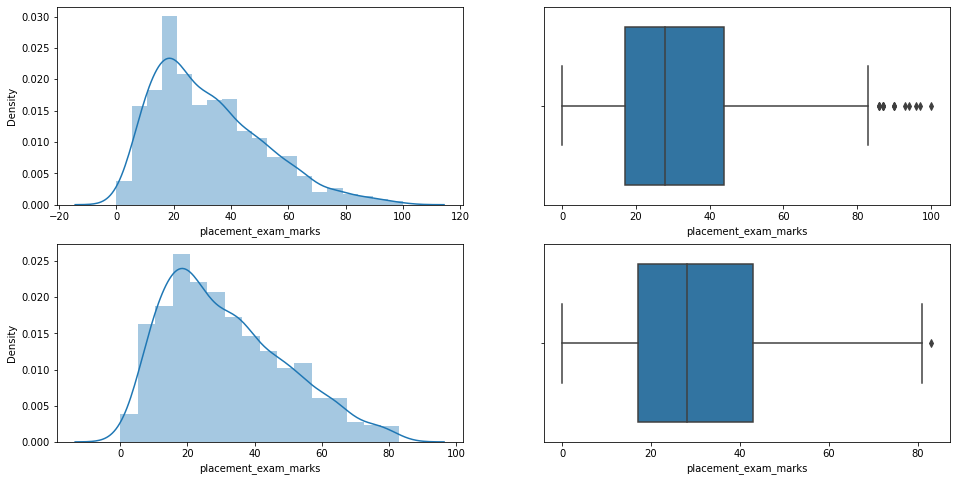

In [136]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()


In [137]:
#mthod 2 capping the outliers

new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [138]:
new_df_cap.shape

(1000, 3)

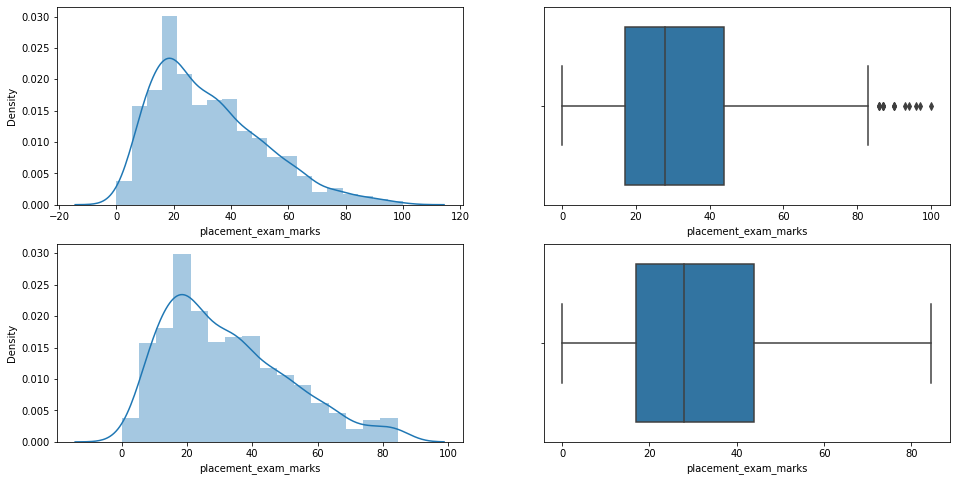

In [139]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

# 3. Outlier Detection using Percentile Method

**What is percentile?**

A percentile is a term that describes how a score compares to other scores from the same set. 

Example: if you have 50percentile it means that 50% people are below yours.

In this method we are setting percentile as range.

After detection of outliers using this percentile range we can either remove those outliers or Cap them.

Capping is also known as **Winsorization.**

## Code

In [141]:
uploads = files.upload()

Saving weight-height.csv to weight-height (1).csv


In [142]:
df2 = pd.read_csv('weight-height.csv')

In [143]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [144]:
df2.shape

(10000, 3)

In [145]:
df2['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

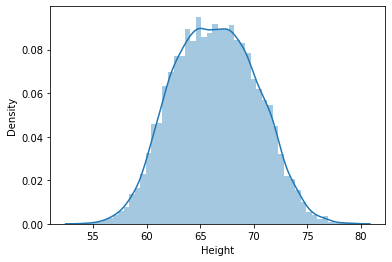

In [146]:
sns.distplot(df2['Height'])

**Inference:** Normal Distribution in the Height column.

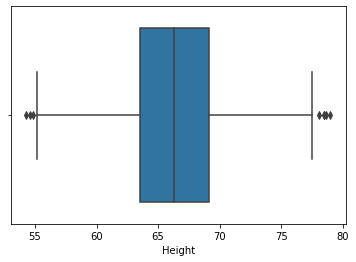

In [147]:
sns.boxplot(df2['Height'])

In [148]:
upper_limit = df2['Height'].quantile(0.99)         #means any value over 99 percentile is an outlier
upper_limit

74.7857900583366

In [149]:
lower_limit = df2['Height'].quantile(0.01)        #means any value below 1 percentile is an outlier
lower_limit

58.13441158671655

In [150]:
df2[(df2['Height'] >= 74.78) | (df2['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [151]:
#creating a new dataframe

new_df2 = df2[(df2['Height'] <= 74.78) & (df2['Height'] >= 58.13)]
new_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


**Inference:** Outliers removed.

In [152]:
new_df2['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

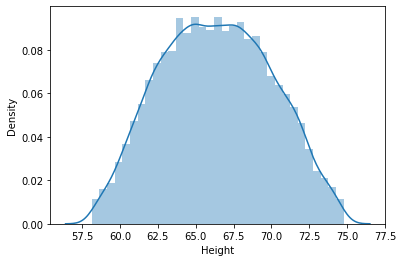

In [153]:
sns.distplot(new_df2['Height'])

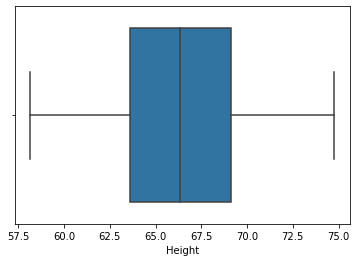

In [154]:
sns.boxplot(new_df2['Height'])

In [155]:
#Winsorization

df2['Height'] = np.where(df2['Height'] >= upper_limit,
         upper_limit,
         np.where(df2['Height'] <= lower_limit,
         lower_limit,
         df2['Height']))

In [156]:
df2.shape

(10000, 3)

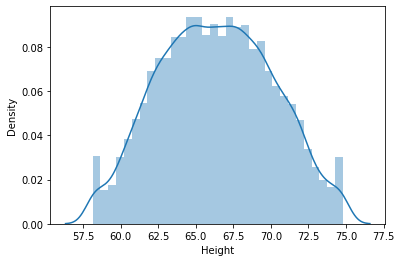

In [157]:
sns.distplot(df2['Height'])

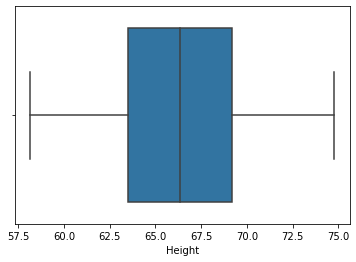

In [158]:
sns.boxplot(df2['Height'])